Setup
-------------
import packages,
load pre-trained net,
load data

In [66]:
# setup
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline


#load data
import joblib
X, Y, coords = joblib.load('data/ElNino/elnino_data.pkl')


C:\Users\bened\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: The file 'data/ElNino/elnino_data.pkl' has been generated with a joblib version less than 0.10. Please regenerate this pickle file.
  # Remove the CWD from sys.path while we load stuff.


# Load bottleneck neuron activations for gamma=1 (g=0), beta=0.1 (b=1)
-----------------------------------------

In [67]:
#load activation vectors for X and Y samples
X_activ_b1 = joblib.load('results/ElNino/variables/XtoYg0b1.pkl')
Y_activ_b1 = joblib.load('results/ElNino/variables/YtoXg0b1.pkl')
#transposed, i.e. ordere by neuron
X_activ_b1T = np.transpose(X_activ_b1)
Y_activ_b1T = np.transpose(Y_activ_b1)

print('shape of activation data: ', np.shape(X_activ_b1))

#load stds of VAE
X_std_b1 = np.transpose(joblib.load('results/ElNino/vce_stds/XtoYg0b1.pkl'))
Y_std_b1 = np.transpose(joblib.load('results/ElNino/vce_stds/YtoXg0b1.pkl'))

shape of activation data:  (13140, 16)


### Plot distribution of activations

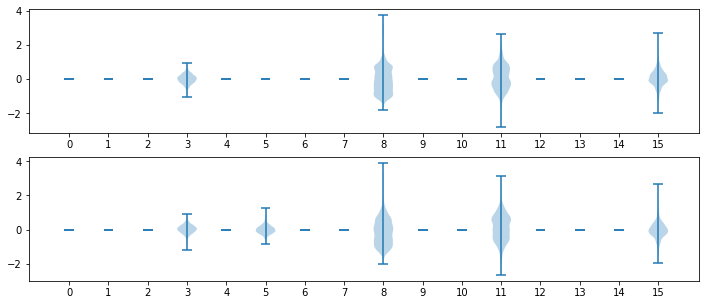

In [68]:
fig = plt.figure(figsize=(12,5))
a1 = plt.subplot2grid((2,1), (0,0))
a1.violinplot(tuple(X_activ_b1T)) #X
a1.set_xticks(np.arange(1, 17)); a1.set_xticklabels(np.arange(32))
a2 = plt.subplot2grid((2,1), (1,0))
a2.violinplot(tuple(Y_activ_b1T)) #Y
a2.set_xticks(np.arange(1, 17)); a2.set_xticklabels(np.arange(32))
plt.show()

### Plot distribution of noise STDs

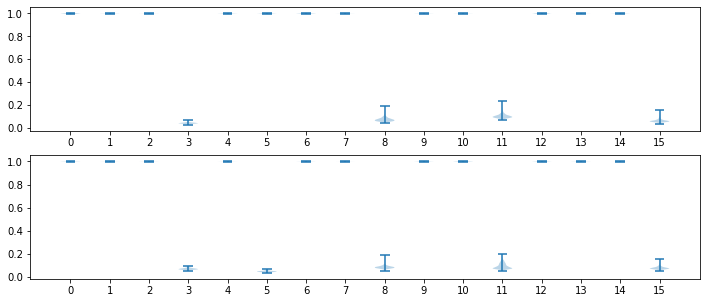

In [69]:
fig = plt.figure(figsize=(12,5))
a1 = plt.subplot2grid((2,1), (0,0))
a1.violinplot(tuple(X_std_b1)) #X
a1.set_xticks(np.arange(1, 17)); a1.set_xticklabels(np.arange(32))
a2 = plt.subplot2grid((2,1), (1,0))
a2.violinplot(tuple(Y_std_b1)) #Y
a2.set_xticks(np.arange(1, 17)); a2.set_xticklabels(np.arange(32))
plt.show() 

In [70]:
#select variable neurons
Xvar_b1 = [i for i, e in enumerate(np.mean(X_std_b1, axis=1)) if e < .95]    # X variables
Yvar_b1 = [i for i, e in enumerate(np.mean(Y_std_b1, axis=1)) if e < .95]    # Y variables

X_var_b1 = X_activ_b1[:,Xvar_b1]
Y_var_b1 = Y_activ_b1[:,Yvar_b1]

print(np.shape(Y_var_b1))
print(np.shape(X_var_b1))
print('neuron 14:    var std:', np.std(X_activ_b1T[1]), '   noise std:', np.mean(X_std_b1[1]))

(13140, 5)
(13140, 4)
neuron 14:    var std: 0.00026467728    noise std: 0.99998546


Visualize temperature variables through samples
-----------------------

In [71]:
#list of samples with 4 high and 4 low activations per neuron
Yb1_4high4low = list(np.append(Y_activ_b1T[i].argsort()[-4:], Y_activ_b1T[i].argsort()[:4]) 
                     for i in range(np.shape(Y_activ_b1T)[0]))

### show highest/lowest activation samples

high activation samples (left):  [4604  134 5540 3484]
low activation samples (right):  [12784   205  5839  9912]
activations: [ 2.526  2.581  2.613  2.666 -1.961 -1.95  -1.855 -1.84 ]


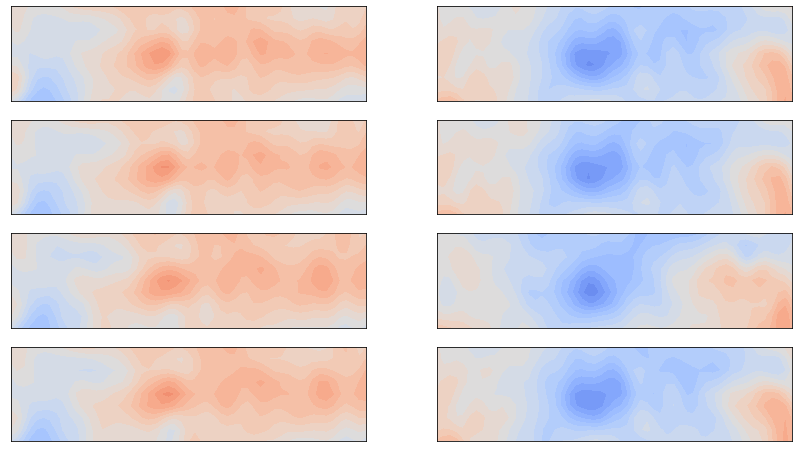

In [72]:
# visualize variable by plotting difference from all frames' mean.

neuron = Yvar_b1[4]         ## choose neuron (2: WP, 4: CT)

samples = Yb1_4high4low[neuron]
print('high activation samples (left): ', samples[:4])
print('low activation samples (right): ', samples[4:])
print('activations:',np.round(Y_activ_b1T[neuron][samples],3))

#plots
fig = plt.figure(figsize=(14,8), facecolor='white')
imshape = (55, 9)
levels = np.linspace(-6,6,30)

for i in range(4):
    ax = plt.subplot2grid((4,2), (i, 0))
    sample = (Y[samples[i]]-Y.mean(axis=0)).reshape(imshape).T
    im = ax.contourf(coords['x'].ravel(), coords['y'].ravel(), sample, levels=levels, cmap='coolwarm')
    ax.set_xticks([]); ax.set_yticks([])

for i in range(4):
    ax = plt.subplot2grid((4,2), (i, 1))
    sample = (Y[samples[i+4]]-Y.mean(axis=0)).reshape(imshape).T
    im = ax.contourf(coords['x'].ravel(), coords['y'].ravel(), sample, levels=levels, cmap='coolwarm')
    ax.set_xticks([]); ax.set_yticks([])

Visualize wind variables through samples
-----------------------

In [73]:
#list of samples with 4 high and 4 low activations per neuron
Xb1_4high4low = list(np.append(X_activ_b1T[i].argsort()[-4:], X_activ_b1T[i].argsort()[:4]) 
                     for i in range(np.shape(X_activ_b1T)[0]))

### show highest/lowest activation samples

high activation samples (left):  [8960 9607 3735 2815]
low activation samples (right):  [ 1489 11654  6721  8511]
activations: [ 3.714  3.719  3.742  3.763 -1.797 -1.727 -1.71  -1.635]


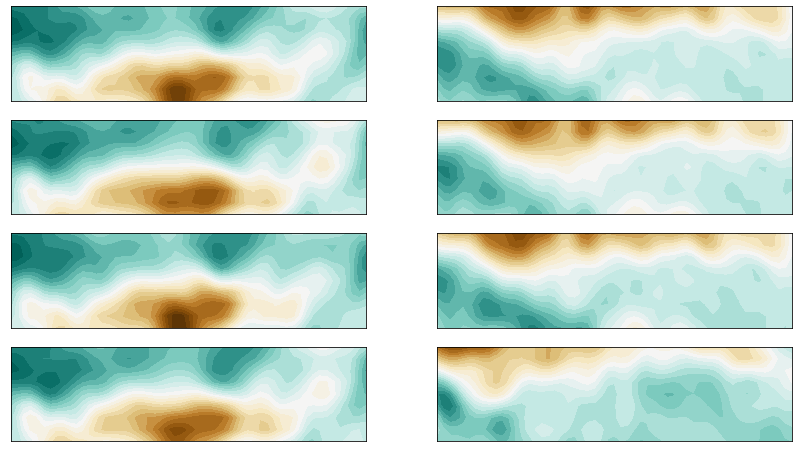

In [74]:
# visualize variable by plotting difference from all frames' mean.

neuron = Xvar_b1[1]         ## choose neuron (1: WP, 3: CT in temperatures)

samples = Xb1_4high4low[neuron]
print('high activation samples (left): ', samples[:4])
print('low activation samples (right): ', samples[4:])
print('activations:',np.round(X_activ_b1T[neuron][samples],3))

#plots
fig = plt.figure(figsize=(14,8), facecolor='white')
imshape = (55, 9)
levels = np.linspace(-8,15,30)

for i in range(4):
    ax = plt.subplot2grid((4,2), (i, 0))
    sample = (X[samples[i]]-X.mean(axis=0)).reshape(imshape).T
    im = ax.contourf(coords['x'].ravel(), coords['y'].ravel(), sample, levels=levels, cmap='BrBG_r')
    ax.set_xticks([]); ax.set_yticks([])

for i in range(4):
    ax = plt.subplot2grid((4,2), (i, 1))
    sample = (X[samples[i+4]]-X.mean(axis=0)).reshape(imshape).T
    im = ax.contourf(coords['x'].ravel(), coords['y'].ravel(), sample, levels=levels, cmap='BrBG_r')
    ax.set_xticks([]); ax.set_yticks([])

Scatter X vs Y variables
-----------------

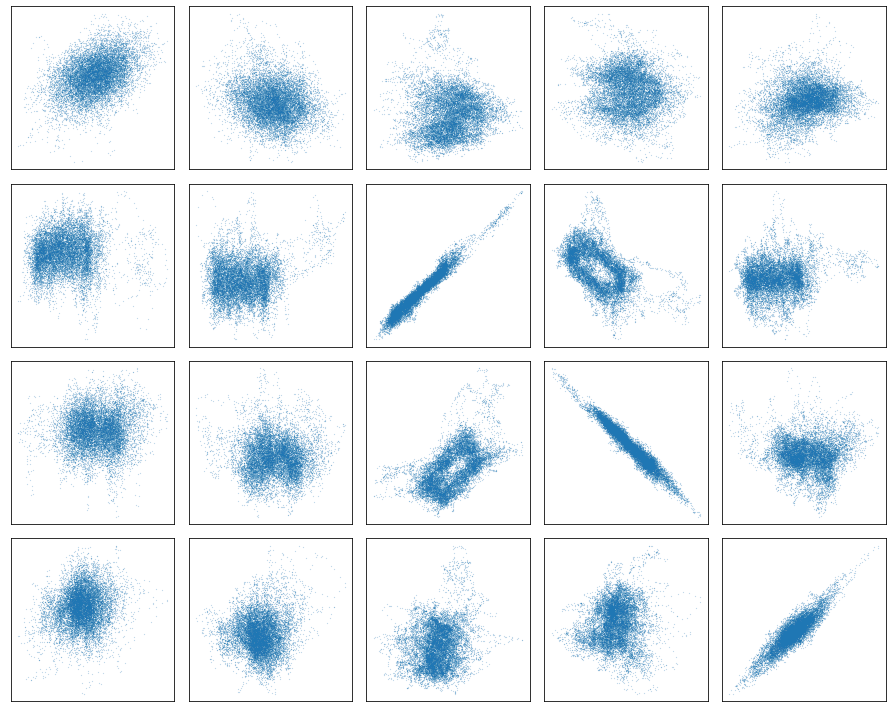

In [75]:
lenX = len(Xvar_b1)
lenY = len(Yvar_b1)
# plot
fig = plt.figure(figsize=(12.5,10))
for i in range(lenX):
    for j in range(lenY):
        ax = plt.subplot2grid((lenX,lenY), (i, j))
        plt.scatter(X_activ_b1T[Xvar_b1[i]], Y_activ_b1T[Yvar_b1[j]], marker='.', s=.04)
        ax.set_xticks([]); ax.set_yticks([])

plt.tight_layout()

## Figure for thesis

low activation 8 samples (left):  3735
low activation 15 samples (right):  4604


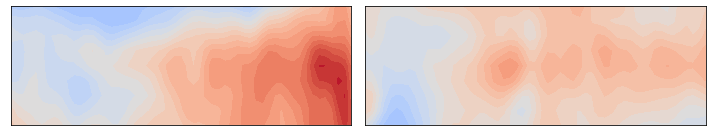

In [76]:
# visualize feature by plotting difference from all frames' mean. (32 neurons)
neuron1 = Yvar_b1[2]
neuron2 = Yvar_b1[4]

print('low activation', neuron1, 'samples (left): ', Yb1_4high4low[neuron1][0])
print('low activation', neuron2, 'samples (right): ', Yb1_4high4low[neuron2][0])
fig = plt.figure(figsize=(10,2), facecolor='white')
imshape = (55, 9)
levels = np.linspace(-6,6,30)

for i in range(1):
    ax = plt.subplot2grid((1,2), (i, 0))
    sample = (Y[Yb1_4high4low[neuron1][0]]-Y.mean(axis=0)).reshape(imshape).T
    im = ax.contourf(coords['x'].ravel(), coords['y'].ravel(), sample, levels=levels, cmap='coolwarm')
    ax.set_xticks([]); ax.set_yticks([])

for i in range(1):
    ax = plt.subplot2grid((1,2), (i, 1))
    sample = (Y[Yb1_4high4low[neuron2][0]]-Y.mean(axis=0)).reshape(imshape).T
    im = ax.contourf(coords['x'].ravel(), coords['y'].ravel(), sample, levels=levels, cmap='coolwarm')
    ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()